In [2]:
# Load necessary library and module
import warnings
warnings.filterwarnings('ignore')

import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import string
import unicodedata
import nltk
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, GridSearchCV


%matplotlib inline
# %load_ext google.colab.data_table

In [3]:
mlbb = pd.read_csv('dataset/mlbb_clean_content_after_preprocessing_21062022.csv')#,encoding='utf-8')
# ffm = pd.read_csv('dataset/ffm_clean_content_after_preprocessing_20062022.csv')#, encoding='ISO-8859-1')
# hdi = pd.read_csv('dataset/hdi_clean_content_after_preprocessing_20062022.csv')#, encoding='ISO-8859-1')

In [4]:
mlbb = mlbb[['content','clean_content','score','sentiment','label']]
# ffm = ffm[['content', 'clean_content','score','sentiment']]
# hdi = hdi[['content', 'clean_content','score','sentiment']]
print(mlbb.label)

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
1195    positive
1196    positive
1197    positive
1198    positive
1199    positive
Name: label, Length: 1200, dtype: object


# Remove NULL Values

In [5]:
mlbb= mlbb[mlbb['clean_content'].notna()]
# ffm= ffm[ffm['clean_content'].notna()]
# hdi= hdi[hdi['clean_content'].notna()]

In [6]:
class_names = ['negative', 'neutral', 'positive']

### Hyperparameter tuning using grid search and cross validation

In [7]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

Split Training And Testing Dataset

In [21]:

X = mlbb['clean_content']     # Define feature matrix
y = mlbb['sentiment']         # Define target feature matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('[INFO] Sebaran kelas pada training set: negative={}, neutral={}, dan positive={}'.format(sum(y_train==0), sum(y_train==1), sum(y_train==2)))
print('[INFO] Sebaran kelas pada testing set negative={}, neutral={}, dan positive={}'.format(sum(y_test==0), sum(y_test==1), sum(y_test==2)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape



[INFO] Sebaran kelas pada training set: negative=268, neutral=257, dan positive=250
[INFO] Sebaran kelas pada testing set negative=115, neutral=110, dan positive=108


((775,), (333,), (775,), (333,))

In [17]:

X_train_data=pd.DataFrame(X_train)
X_test_data=pd.DataFrame(X_test)
X_train_data.head()

,clean_content
1086,personally would besides league mobile best li...
1191,love game used love design favorite hero
219,seen game connection annoying though good conn...
117,made couple
915,send photo


### Normalize the Predictor(Feature Set) for SVM training 

In [22]:
# Seperating Predictors and Outcome values from train and test sets
# X_train = pd.DataFrame(X_train.drop(['label'],axis=1))
# X_train = X_train.iloc[:,1:]
Y_train_label = X_train.label.values.astype(object)

# X_test = pd.DataFrame(X_test.drop(['label'],axis=1))
# X_test = X_test.iloc[:,1:]
Y_test_label = X_test.label.values.astype(object)


AttributeError: 'Series' object has no attribute 'label'

In [ ]:

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))
names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training dan Testing Tokopedia

In [86]:
#X_test.head()
X_train_data.head()
#shopee.clean_content.head()

,clean_content
1086,personally would besides league mobile best li...
1191,love game used love design favorite hero
219,seen game connection annoying though good conn...
117,made couple
915,send photo


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
tfidf = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf.fit_transform(X_train) # fit train
X_test_bow = tfidf.transform(X_test) # transform test
# tfidf=TfidfVectorizer(ngram_range=ngram_range,min_df=min_df)

# from sklearn.feature_extraction.text import CountVectorizer
#ngram_range=(1,2) #bigram
# ngram_range=(1,3) #trigram
#ngram_range=(1,2) #bigram
# min_df=5

# tfidf=TfidfVectorizer(ngram_range=ngram_range,min_df=min_df)
# tfidf=TfidfVectorizer(max_features=2000)

# Term Weighting TFIDF X Training

In [88]:
# mlbb_vector_x_train=tfidf.fit_transform(X_train_bow).toarray()
mlbb_vector_x_train=X_train_bow.toarray()
# mlbb_vector_x_train_cv=cv.fit_transform(X_train).toarray()
mlbb_x_train_df=pd.DataFrame(mlbb_vector_x_train,columns=tfidf.get_feature_names())
# mlbb_x_train_df=pd.DataFrame(mlbb_vector_x_train_cv)
mlbb_x_train_df.head()


,able,account,actually,almost,already,also,always,amazing,annoying,another,...,well,went,whenever,without,work,works,worse,worst,would,wrong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.523047,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235171,0.0,...,0.0,0.0,0.0,0.280083,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [89]:
mlbb_x_train_df.info()
# toped_x_train_df.info()
# lazada_x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Columns: 225 entries, able to wrong
dtypes: float64(225)
memory usage: 1.3 MB


# Term Weighting TFIDF X Testing

In [107]:
# mlbb_vector_x_test=tfidf.transform(X_test).toarray()
mlbb_vector_x_test=X_test_bow.toarray()
mlbb_x_test_df=pd.DataFrame(mlbb_vector_x_test,columns=tfidf.get_feature_names())
mlbb_x_test_df.head()
#toped_df.head()

,able,account,actually,almost,already,also,always,amazing,annoying,another,...,well,went,whenever,without,work,works,worse,worst,would,wrong
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.265848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
from sklearn.svm import SVC

# Linear Model

In [92]:
svc_model = SVC(C= 1, kernel='rbf', gamma= 1)
# svc_model.fit(mlbb_vector_x_train, y_train)
svc_model.fit(X_train_bow, y_train)

SVC(C=1, gamma=1)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = svc_model.predict(mlbb_vector_x_train)
# train_acc = accuracy_score(y_train, svc_model.predict(mlbb_vector_x_train))
print(classification_report(y_train, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_train, pred))
print("Accuracy: \n", accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       268
           1       0.90      0.80      0.85       257
           2       0.88      0.85      0.86       250

    accuracy                           0.86       775
   macro avg       0.86      0.86      0.86       775
weighted avg       0.86      0.86      0.86       775


Confusion Matrix: 
 [[246  10  12]
 [ 33 206  18]
 [ 26  12 212]]
Accuracy: 
 0.8567741935483871


In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = svc_model.predict(mlbb_vector_x_test)
print(classification_report(y_test, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Accuracy: \n", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.44      0.65      0.53       115
           1       0.38      0.33      0.35       110
           2       0.59      0.38      0.46       108

    accuracy                           0.46       333
   macro avg       0.47      0.45      0.45       333
weighted avg       0.47      0.46      0.45       333


Confusion Matrix: 
 [[75 30 10]
 [56 36 18]
 [38 29 41]]
Accuracy: 
 0.45645645645645644


# Training

In [1]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

In [111]:
C=0.7
# Create and train a random forest classifier
# forest = RandomForestClassifier()
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          ('SVC Sigmoid', SVC(kernel='sigmoid',C=C)),
          # ('Naive Bayes', MultinomialNB()),
          # ('Decision Tree', DecisionTreeClassifier()),
          # ('Random Forest',RandomForestClassifier(n_estimators=50)),
          # ('Regresi Linier',LogisticRegression()),
        ]


In [112]:
for name, clf in models:
  clf.fit(mlbb_vector_x_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(mlbb_vector_x_train))
  print('[INFO] Menggunakan {}, akurasi pada training set: {}'.format(name, train_acc))

[INFO] Menggunakan SVC linear kernel, akurasi pada training set: 0.6438709677419355
[INFO] Menggunakan SVC RBF kernel, akurasi pada training set: 0.8090322580645162
[INFO] Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.92
[INFO] Menggunakan SVC Sigmoid, akurasi pada training set: 0.5574193548387096


# Cross Validation

In [114]:
# cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for name, model in models:
  clf.fit(mlbb_vector_x_train, y_train)
  cv = KFold(n_splits=15, random_state=42, shuffle=True)
  cross_val_acc = cross_val_score(clf, mlbb_vector_x_train, y_train, cv=cv, scoring='accuracy')
  print('[INFO] Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f})'.format(name, cross_val_acc.mean(), cross_val_acc.std() * 2))

[INFO] Menggunakan SVC linear kernel, Cross-validation akurasi: 0.425867 (+/- 0.148119)
[INFO] Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.425867 (+/- 0.148119)
[INFO] Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.425867 (+/- 0.148119)
[INFO] Menggunakan SVC Sigmoid, Cross-validation akurasi: 0.425867 (+/- 0.148119)


Training Confusion Matrix

In [115]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
# X_train = cv.fit_transform(shopee_vector_x_train.clean_content)
# X_test = cv.transform(shopee_vector_x_test.clean_content)
tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test

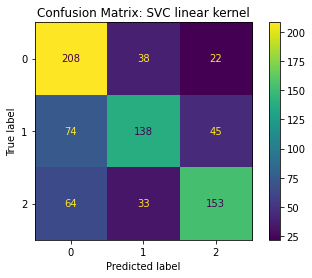

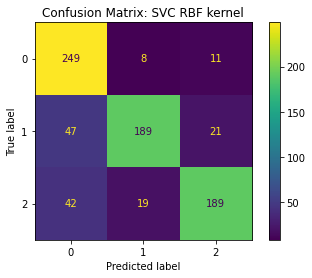

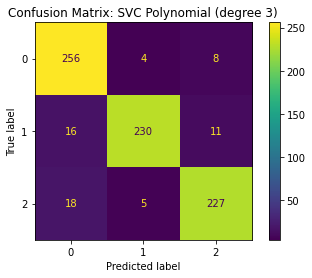

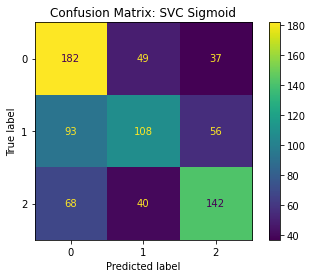

In [116]:
from sklearn.metrics import plot_confusion_matrix

for name, model in models:
  plot_confusion_matrix(model, mlbb_vector_x_train, y_train) 
  plt.title('Confusion Matrix: {}'.format(name))
  plt.show()

# Testing

In [117]:
for name, clf in models:
  clf_predict = clf.predict(mlbb_vector_x_test)
  test_acc = accuracy_score(y_test, clf.predict(mlbb_vector_x_test))
  print('[INFO] Menggunakan {}, akurasi pada testing set: {}'.format(name, test_acc))

[INFO] Menggunakan SVC linear kernel, akurasi pada testing set: 0.44744744744744747
[INFO] Menggunakan SVC RBF kernel, akurasi pada testing set: 0.43543543543543545
[INFO] Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.43843843843843844
[INFO] Menggunakan SVC Sigmoid, akurasi pada testing set: 0.4594594594594595


Laporan Testing

In [118]:
print("[INFO] Laporan klasifikasi\n")
for name, clf in models:
  clf_predict = clf.predict(mlbb_vector_x_test)
  print('[INFO] Menggunakan {}'.format(name))
  print(classification_report(y_test, clf_predict, target_names=['negative', 'neutral', 'positive']))

[INFO] Laporan klasifikasi

[INFO] Menggunakan SVC linear kernel
              precision    recall  f1-score   support

    negative       0.44      0.59      0.50       115
     neutral       0.38      0.35      0.37       110
    positive       0.57      0.39      0.46       108

    accuracy                           0.45       333
   macro avg       0.46      0.44      0.44       333
weighted avg       0.46      0.45      0.44       333

[INFO] Menggunakan SVC RBF kernel
              precision    recall  f1-score   support

    negative       0.42      0.72      0.53       115
     neutral       0.35      0.26      0.30       110
    positive       0.61      0.31      0.41       108

    accuracy                           0.44       333
   macro avg       0.46      0.43      0.41       333
weighted avg       0.46      0.44      0.42       333

[INFO] Menggunakan SVC Polynomial (degree 3)
              precision    recall  f1-score   support

    negative       0.40      0.80      

Testing Confusion Matrix